# Machine Learning Engineer Nanodegree - Capstone Project

## Appliance Energy Prediction


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [94]:
data = pd.read_csv("energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [96]:
print('The number of rows in dataset is = ' , data.shape[0])
print('The number of columns in dataset is = ' , data.shape[1])

The number of rows in dataset is =  19735
The number of columns in dataset is =  29


In [97]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## cheking for nulls in dataset

In [98]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

## split data to train and test

In [99]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.20,random_state=42)

In [100]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,...,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.949709,3.808589,21.688684,40.266486,20.345215,40.428811,22.269113,39.248114,20.854106,39.047357,...,19.488493,41.570982,7.418384,755.532075,79.822742,4.030780,38.330689,3.781387,25.027694,25.027694
std,103.136328,7.963182,1.609561,3.957219,2.196357,4.067871,2.007629,3.245545,2.051129,4.329110,...,2.021992,4.156227,5.327514,7.373040,14.895451,2.436011,11.815744,4.202189,14.504991,14.504991
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.775937,37.399167,18.823333,37.900000,20.790000,36.900000,19.533333,35.590000,...,18.000000,38.530000,3.633333,750.916667,70.333333,2.000000,29.000000,0.933333,12.510037,12.510037
50%,60.000000,0.000000,21.600000,39.663333,20.000000,40.500000,22.100000,38.560000,20.633333,38.463333,...,19.390000,40.933333,6.933333,756.100000,84.000000,3.666667,40.000000,3.433333,24.912220,24.912220
75%,100.000000,0.000000,22.600000,43.060000,21.500000,43.290000,23.290000,41.760000,22.100000,42.193333,...,20.600000,44.363333,10.416667,760.937500,91.666667,5.500000,40.000000,6.600000,37.665543,37.665543
max,1080.000000,70.000000,26.260000,57.423333,29.856667,54.766667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.400000,49.996530,49.996530


## this is not a timeseries problem and we will focus on predicting the appliance consumption , we will ignore Date column

In [101]:
# Divide the columns based on type

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [102]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [103]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,...,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.688684,20.345215,22.269113,20.854106,19.598492,7.913931,20.266936,22.029474,19.488493,40.266486,...,41.570982,7.418384,3.781387,79.822742,755.532075,4.030780,38.330689,3.808589,25.027694,25.027694
std,1.609561,2.196357,2.007629,2.051129,1.850812,6.102256,2.116903,1.959194,2.021992,3.957219,...,4.156227,5.327514,4.202189,14.895451,7.373040,2.436011,11.815744,7.963182,14.504991,14.504991
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.030000,15.390000,16.306667,14.890000,27.023333,...,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.775937,18.823333,20.790000,19.533333,18.290000,3.595000,18.700000,20.790000,18.000000,37.399167,...,38.530000,3.633333,0.933333,70.333333,750.916667,2.000000,29.000000,0.000000,12.510037,12.510037
50%,21.600000,20.000000,22.100000,20.633333,19.390000,7.300000,20.060000,22.100000,19.390000,39.663333,...,40.933333,6.933333,3.433333,84.000000,756.100000,3.666667,40.000000,0.000000,24.912220,24.912220
75%,22.600000,21.500000,23.290000,22.100000,20.632083,11.263333,21.600000,23.390000,20.600000,43.060000,...,44.363333,10.416667,6.600000,91.666667,760.937500,5.500000,40.000000,0.000000,37.665543,37.665543
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,57.423333,...,53.326667,26.100000,15.400000,100.000000,772.300000,14.000000,66.000000,70.000000,49.996530,49.996530


In [104]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     12205
10     1766
20     1289
30      455
40       64
50        7
70        1
60        1
Name: lights, dtype: int64

In [105]:
target_vars.describe()

,Appliances
count,15788.000000
mean,97.949709
std,103.136328
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


## Observations
* Temperature - Temperature inside the house varies between 15 & 30 Degs , temperatire outside (T6) varies between -6 to 28.3 Degs.
* Humidiy - Humidity inside house varies between 20.60% to 63.36% with exception of RH_6 (Outside house) and  RH_5 (Bathroom) which varies between  1% to 99.9% and 29.82% to 96.32% respectively.
* Appliances - 75% of Appliance energy consumption is less than 100 Wh . With the maximum energy consumption of 1080 Wh , there will be some outliers in this column and there will be small number of cases where consumption is very high
* Lights - With 12205 zero enteries in 15788 rows , this column will not add any value to the model so I will drop lights column

In [106]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [107]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,...,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.688684,20.345215,22.269113,20.854106,19.598492,7.913931,20.266936,22.029474,19.488493,40.266486,...,42.964343,41.570982,7.418384,3.781387,79.822742,755.532075,4.030780,38.330689,25.027694,25.027694
std,1.609561,2.196357,2.007629,2.051129,1.850812,6.102256,2.116903,1.959194,2.021992,3.957219,...,5.219066,4.156227,5.327514,4.202189,14.895451,7.373040,2.436011,11.815744,14.504991,14.504991
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.030000,15.390000,16.306667,14.890000,27.023333,...,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.006033,0.006033
25%,20.775937,18.823333,20.790000,19.533333,18.290000,3.595000,18.700000,20.790000,18.000000,37.399167,...,39.090000,38.530000,3.633333,0.933333,70.333333,750.916667,2.000000,29.000000,12.510037,12.510037
50%,21.600000,20.000000,22.100000,20.633333,19.390000,7.300000,20.060000,22.100000,19.390000,39.663333,...,42.427857,40.933333,6.933333,3.433333,84.000000,756.100000,3.666667,40.000000,24.912220,24.912220
75%,22.600000,21.500000,23.290000,22.100000,20.632083,11.263333,21.600000,23.390000,20.600000,43.060000,...,46.561667,44.363333,10.416667,6.600000,91.666667,760.937500,5.500000,40.000000,37.665543,37.665543
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,57.423333,...,58.780000,53.326667,26.100000,15.400000,100.000000,772.300000,14.000000,66.000000,49.996530,49.996530


In [108]:
feature_vars.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
2133,19.890000,19.200000,20.390000,19.10,17.511111,11.100000,17.50,18.111111,17.166667,45.50,...,50.000000,48.700000,10.300000,7.950000,85.500000,761.900000,7.500000,23.500000,39.240863,39.240863
19730,25.566667,25.890000,27.200000,24.70,23.200000,24.796667,24.50,24.700000,23.200000,46.56,...,50.074000,46.790000,22.733333,13.333333,55.666667,755.200000,3.333333,23.666667,43.096812,43.096812
3288,22.500000,21.533333,21.963333,22.00,19.100000,6.530000,19.29,20.566667,18.600000,44.43,...,41.331111,45.530000,6.600000,0.200000,64.000000,760.200000,8.000000,40.000000,42.054659,42.054659
7730,19.790000,17.200000,20.600000,18.39,18.290000,2.790000,18.10,20.500000,18.390000,38.06,...,42.590000,40.723333,2.100000,1.233333,94.333333,741.533333,1.000000,48.666667,12.615865,12.615865
8852,20.600000,17.100000,20.290000,19.50,18.200000,-0.666667,20.70,22.700000,18.926667,35.29,...,39.260000,40.090000,-0.866667,-1.933333,92.333333,768.266667,1.666667,34.000000,10.897926,10.897926


## Data Visualization

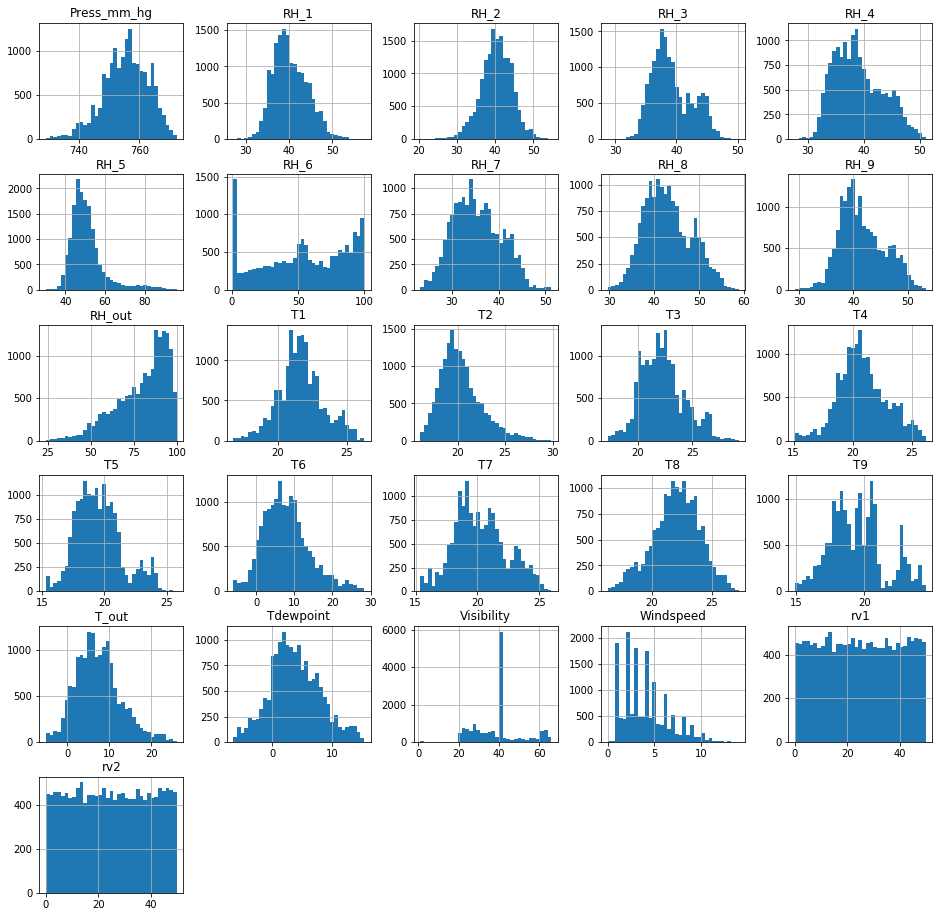

In [109]:
# Histogram of all fetures
feature_vars.hist(bins = 35 , figsize= (16,16)) ;

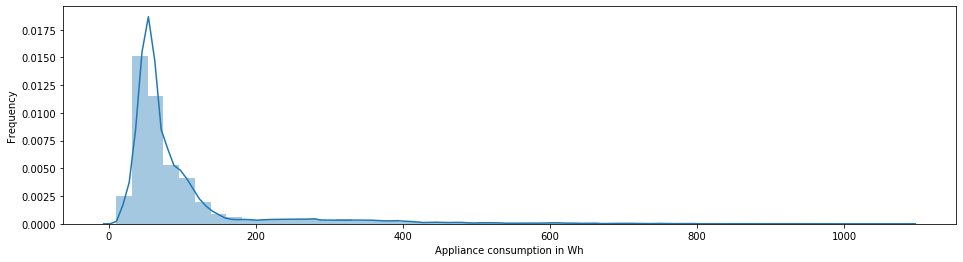

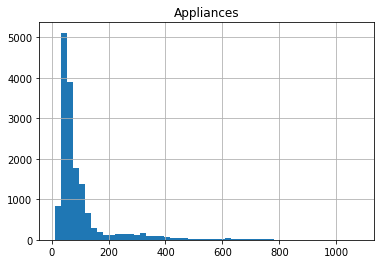

In [110]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(16,4))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins = 50 ) ;
target_vars.hist(bins=50);

## Correlation Plots

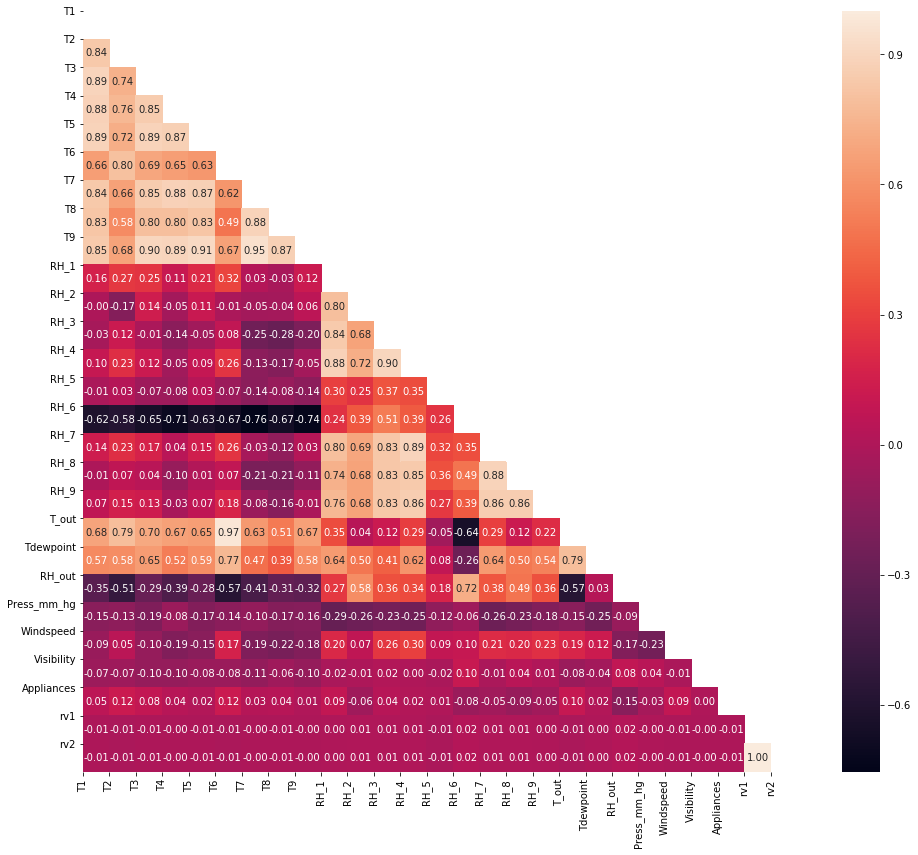

In [111]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [112]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1    rv2          1.000000
T6     T_out        0.974923
T7     T9           0.945294
T5     T9           0.911297
T3     T9           0.902660
RH_3   RH_4         0.899453
RH_4   RH_7         0.894638
T1     T3           0.892569
T4     T9           0.891041
T3     T5           0.888816
T1     T5           0.886223
RH_7   RH_8         0.883542
T7     T8           0.883534
RH_1   RH_4         0.880480
T4     T7           0.879771
T1     T4           0.878034
T4     T5           0.873178
T5     T7           0.871509
T8     T9           0.870747
RH_7   RH_9         0.858456
RH_8   RH_9         0.856453
RH_4   RH_9         0.856087
T3     T4           0.853868
       T7           0.849634
RH_4   RH_8         0.848063
T1     T9           0.845097
RH_1   RH_3         0.844242
T1     T7           0.839857
       T2           0.836988
RH_3   RH_9         0.834240
       RH_7         0.833566
       RH_8         0.830525
T1     T8           0.826774
T5     T8        

## Observations based on correlation plot
* Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

* Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values so all will be dropped

* Humidity - RH_4 highly correlate with RH_3,7,1,9 so RH_4 will be dropped 

* Random variables have no role to play so they will be dropped

## Data Pre Processing

In [113]:
#Split test and train into independent and dependent varibales

train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]


In [114]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9","Tdewpoint","Press_mm_hg"],axis=1 , inplace=True)
test_X.drop(["rv1","rv2","Visibility","T6","T9","Tdewpoint","Press_mm_hg"], axis=1, inplace=True)

In [115]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'RH_out',
       'Windspeed'],
      dtype='object')

In [116]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = ss.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = ss.fit_transform(test)

In [117]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,RH_out,Windspeed,Appliances
2133,-1.117535,-0.521432,-0.936016,-0.855218,-1.127855,-1.307109,-2.000051,1.322565,1.145891,1.553528,1.767774,0.227892,1.403280,1.583293,1.348111,1.715316,0.540910,0.381152,1.424184,-0.464931
19730,2.409418,2.524617,2.456153,1.875073,1.945969,1.999713,1.363117,1.590438,0.392577,0.590126,1.511362,0.161237,-1.718597,1.779016,1.362290,1.255750,2.874781,-1.621760,-0.286316,0.019880
3288,0.504076,0.540967,-0.152313,0.558683,-0.269346,-0.461508,-0.746661,1.052165,0.531300,1.635181,0.327863,0.486368,0.218719,-0.213443,-0.312946,0.952581,-0.153619,-1.062287,1.629444,-0.271006
7730,-1.179665,-1.432060,-0.831411,-1.201379,-0.707005,-1.023668,-0.780690,-0.557603,0.124030,-0.642372,-0.472943,-0.965245,0.810519,-0.667520,-0.071728,-0.203953,-0.998318,0.974193,-1.244196,-0.561893
8852,-0.676407,-1.477591,-0.985827,-0.660197,-0.755634,0.204581,0.342257,-1.257611,-0.157043,-0.692699,-1.050447,-0.216479,0.445143,-0.356321,-0.709794,-0.356340,-1.555193,0.839920,-0.970516,-0.561893


In [118]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

## Model Implementation

In [119]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [120]:

models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
         ]

In [121]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(train_y,curr_model.predict(train_X)))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [122]:
model_data

[{'Name': 'Ridge: ',
  'Train_Time': 0.008995532989501953,
  'Train_R2_Score': 0.1335931305916086,
  'Test_R2_Score': 0.1344919852120503,
  'Train_RMSE_Score': 0.9308097922821779,
  'Test_RMSE_Score': 0.9303268322412023},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.042975425720214844,
  'Train_R2_Score': 0.6856723038879657,
  'Test_R2_Score': 0.5023525607727921,
  'Train_RMSE_Score': 0.5606493521908629,
  'Test_RMSE_Score': 0.7054413081378266},
 {'Name': 'SVR:',
  'Train_Time': 10.512975931167603,
  'Train_R2_Score': 0.23223737327057503,
  'Test_R2_Score': 0.2118860289514488,
  'Train_RMSE_Score': 0.8762206495680325,
  'Test_RMSE_Score': 0.8877578335607924},
 {'Name': 'RandomForest ',
  'Train_Time': 2.4446215629577637,
  'Train_R2_Score': 0.9171709028471036,
  'Test_R2_Score': 0.4959112306508966,
  'Train_RMSE_Score': 0.2878004467559013,
  'Test_RMSE_Score': 0.7099920910468677},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 0.7225871086120605,
  'Train_R2_Score': 1.0,
  '

In [123]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Name,Test_R2_Score,Test_RMSE_Score,Train_R2_Score,Train_RMSE_Score,Train_Time
0,Ridge:,0.134492,0.930327,0.133593,9.308098e-01,0.008996
1,KNeighborsRegressor:,0.502353,0.705441,0.685672,5.606494e-01,0.042975
2,SVR:,0.211886,0.887758,0.232237,8.762206e-01,10.512976
3,RandomForest,0.495911,0.709992,0.917171,2.878004e-01,2.444622
4,ExtraTreeRegressor :,0.613617,0.621597,1.000000,1.427082e-16,0.722587


## Observations
* Best results over test set are given by Extra Tree Regressor with R2 score of 0.61
* Least RMSE test score is also by Extra Tree Regressor 0.62
* ridge regression was worst performing model

## Parameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [20, 30, 40, 50 ,60],
              'n_estimators' : [50, 100, 150, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 16.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50, 60], 'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [125]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 250}

In [126]:
grid_search.best_estimator_.score(train_X,train_y)

0.9999999559308005

In [127]:
grid_search.best_estimator_.score(test_X,test_y)

0.6494596234921545

In [128]:
# RMSE score on test set with tuned parameters
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.5920645036715558

## Observations
#### Based on parameter tunning step we can see that

* Best possible parameter combination are - 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 250
* Training set R2 score of 1.0 signals of overfitting on training set
* Test set R2 score is 0.65 improvement over 0.61 achieved using untuned model
* Test set RMSE score is 0.60 improvement over 0.62 achieved using untuned model

## Conclusion
* The best Algorithm to use for this dataset Extra Trees Regressor

* The untuned model was able to explain 61% of variance on test set.

* The tuned model was able to explain 65% of varaince on tese set.

* The final model had 19 features

